<a href="https://colab.research.google.com/github/JEROFRAN/Curso_de_lenguajes_de_programaci-n/blob/main/Examen_institucional_ipyn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
!pip install numpy-financial
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import drive

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import pandas as pd

# Ruta del archivo en Drive
ruta_excel = '/content/drive/MyDrive/Colab Notebooks/Flujos_de_caja.xlsx'

# Leer Excel (usualmente la primera hoja)
df = pd.read_excel(ruta_excel)
# Aquí nombramos cada una de las columnas
df.columns = ['Proyecto', 'Inversion_Inicial'] + [f'Año{i}' for i in range(1, 11)]
# Verificar el contenido
df.head()

,Proyecto,Inversion_Inicial,Año1,Año2,Año3,Año4,Año5,Año6,Año7,Año8,Año9,Año10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [145]:
#tamaño de datos
print('\n El tamaño por filas y columnas',df.shape)


 El tamaño por filas y columnas (1000, 12)


In [146]:
df.dtypes
print('\n Los datos son de tipo:\n',df.dtypes)


 Los datos son de tipo:
 Proyecto             object
Inversion_Inicial     int64
Año1                  int64
Año2                  int64
Año3                  int64
Año4                  int64
Año5                  int64
Año6                  int64
Año7                  int64
Año8                  int64
Año9                  int64
Año10                 int64
dtype: object


In [147]:
df.head(5)

,Proyecto,Inversion_Inicial,Año1,Año2,Año3,Año4,Año5,Año6,Año7,Año8,Año9,Año10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [148]:
# Ver la información general del data frame (csv)
print("Información general del DataFrame:")
print(df.info())
print("\n")

# estadísticas generales
print("Resumen estadístico:")
print(df.describe())
print("\n")

# Verificar si hay valores nulos en el DataFrame
print("¿Existen valores que sean nulos?:", df.isnull().values.any())
print("\n")

# Contar cuántos valores nulos hay por columna
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())
print("\n")

# También puedes verificar si hay celdas vacías (cadenas vacías)
print("¿Existen celdas vacias?:", (df == '').any().any())
print("\n")

# Contar cuántas celdas vacías hay por columna
print("Cantidad de celdas vacías por columna:")
print((df == '').sum())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Proyecto           1000 non-null   object
 1   Inversion_Inicial  1000 non-null   int64 
 2   Año1               1000 non-null   int64 
 3   Año2               1000 non-null   int64 
 4   Año3               1000 non-null   int64 
 5   Año4               1000 non-null   int64 
 6   Año5               1000 non-null   int64 
 7   Año6               1000 non-null   int64 
 8   Año7               1000 non-null   int64 
 9   Año8               1000 non-null   int64 
 10  Año9               1000 non-null   int64 
 11  Año10              1000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 93.9+ KB
None


Resumen estadístico:
       Inversion_Inicial          Año1          Año2          Año3  \
count       1.000000e+03  1.000000e+03  1.000000e+0

In [149]:
# Función para calcular el VPN de un proyecto
def calcular_vpn(flujos, tasa_descuento):
    vpn = 0
    for t in range(len(flujos)):
        vpn += flujos[t] / ((1 + tasa_descuento) ** t)
    return vpn

# Definir la tasa de descuento (12%)
tasa = 0.12

# Asegurarse de que los nombres de las columnas coincidan con los esperados
columnas_flujo = ['Inversion_Inicial'] + [f'Año{i}' for i in range(1, 11)]

# Calcular el VPN para cada proyecto
df['VPN'] = df.apply(
    lambda fila: calcular_vpn([fila[col] for col in columnas_flujo], tasa),
    axis=1
)
# Ver resultados
df[['Proyecto', 'VPN']].head()

,Proyecto,VPN
0,Winston Smith,-9.247149e+06
1,Julia,-3.577146e+06
2,O'Brien,1.252428e+07
3,Big Brother,3.915842e+07
4,Don Quijote,5.473385e+07


In [153]:
import numpy_financial as npf  # Importar librería financiera

# Calcular la TIR para cada proyecto
df['TIR'] = df.apply(
    lambda fila: npf.irr(
        [fila['Inversion_Inicial']] + [fila[f'Año{i}'] for i in range(1, 11)]
    ),
    axis=1
)

# Mostrar resultados
from IPython.display import display
display(df[['Proyecto', 'VPN', 'TIR']])

,Proyecto,VPN,TIR
0,Winston Smith,-9.247149e+06,0.096411
1,Julia,-3.577146e+06,0.109983
2,O'Brien,1.252428e+07,0.159578
3,Big Brother,3.915842e+07,0.292613
4,Don Quijote,5.473385e+07,0.418964
...,...,...,...
995,Alyosha KaramÃ¡zov el Sabio del Desierto III I...,6.288136e+07,0.636860
996,Alyosha KaramÃ¡zov el Sabio del Desierto III I...,2.041290e+07,0.187365
997,Odiseo el Sabio el Rojo el Sabio II I,1.988916e+07,0.209139
998,Moriarty la Eterna el Rojo II,-1.220200e+06,0.116199


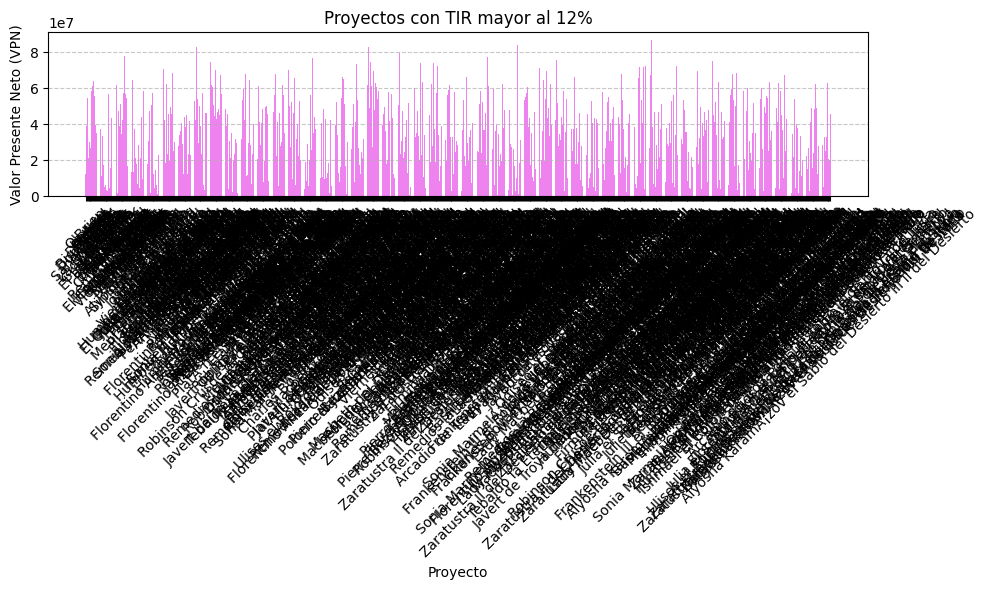

In [170]:
import matplotlib.pyplot as plt

# Filtrar proyectos con TIR mayor a la tasa de descuento
tasa_descuento = 0.12
proyectos_rentables = df[df['TIR'] > tasa_descuento]

# Gráfico de barras: Inversionista vs VPN
plt.figure(figsize=(10, 6))
# Cambiar 'proyecto' a 'Proyecto' para que coincida con el nombre de la columna
plt.bar(proyectos_rentables['Proyecto'], proyectos_rentables['VPN'], color='violet')

plt.xlabel('Proyecto')
plt.ylabel('Valor Presente Neto (VPN)')
plt.title('Proyectos con TIR mayor al 12%')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

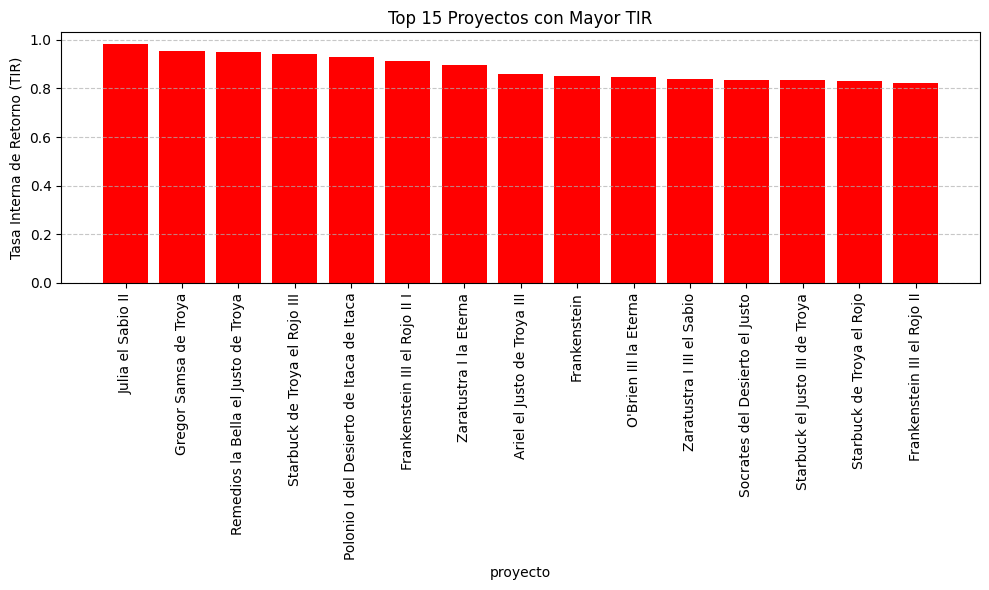

In [182]:
import matplotlib.pyplot as plt

# Filtrar los 15 proyectos con mayor TIR
top_15_proyectos = df.nlargest(15, 'TIR')

# Gráfico de barras: Capitalizador vs VPN para los 15 proyectos con mayor TIR
plt.figure(figsize=(10, 6))
plt.bar(top_15_proyectos['Proyecto'], top_15_proyectos['TIR'], color='red')

plt.xlabel('proyecto')
plt.ylabel('Tasa Interna de Retorno (TIR)')
plt.title('Top 15 Proyectos con Mayor TIR')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

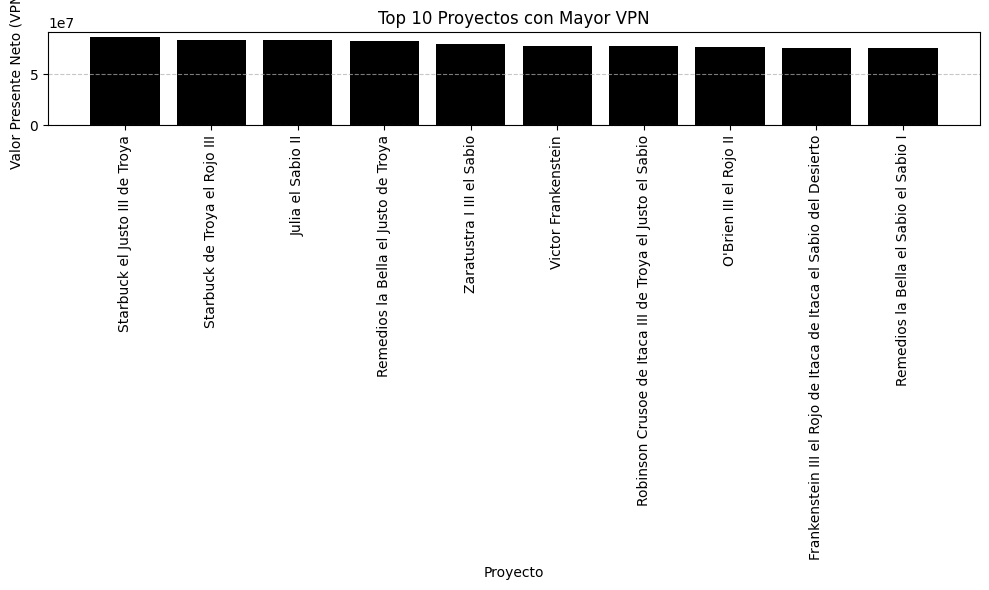

In [183]:
# Filtrar los 10 proyectos con mayor VPN
top_10_vpn = df.nlargest(10, 'VPN')

# Gráfico de barras: Proyecto vs VPN
plt.figure(figsize=(10, 6))

plt.bar(top_10_vpn['Proyecto'], top_10_vpn['VPN'], color='black')


plt.xlabel('Proyecto')
plt.ylabel('Valor Presente Neto (VPN)')
plt.title('Top 10 Proyectos con Mayor VPN')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


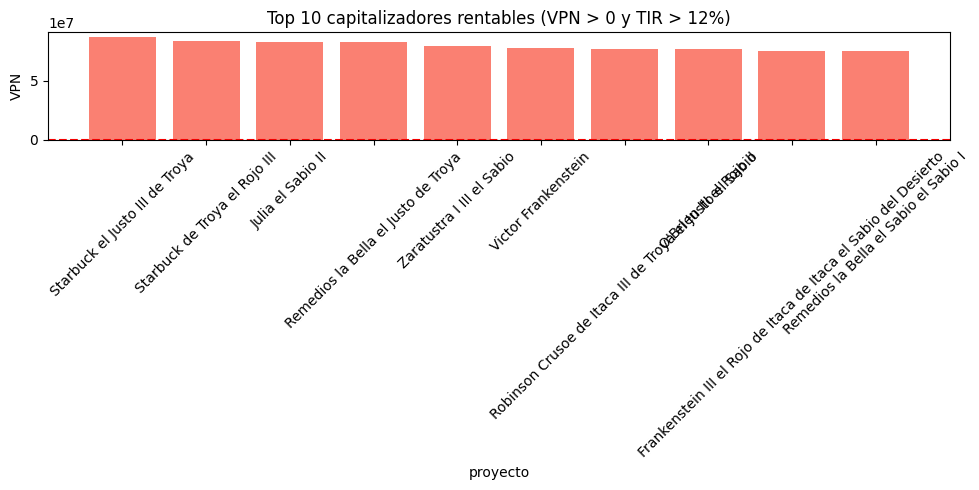

In [187]:

# Filtro de proyectos rentables
proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.12)]

# solo los 10 con mayor VPN
proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

plt.figure(figsize=(10, 5))
plt.bar(proyectos_rentables_top['Proyecto'], proyectos_rentables_top['VPN'], color='salmon')
plt.axhline(0, color='red', linestyle='--')
plt.title('Top 10 capitalizadores rentables (VPN > 0 y TIR > 12%)')
plt.xlabel('proyecto')
plt.ylabel('VPN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [169]:
# Importar librerías necesarias
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# ======== FUNCIONES ========

def ver_datos(b):
    clear_output()
    mostrar_menu()
    display(df.head())

def ver_indicadores(b):
    clear_output()
    mostrar_menu()
    # Corrected the column name from 'proyecto' to 'Proyecto'
    display(df[['Proyecto', 'VPN', 'TIR']])

def ver_graficos(b):
    clear_output()
    mostrar_menu()

    # Filtro de proyectos rentables
    proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.12)]

    # Seleccionar solo los 10 con mayor VPN
    proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

    # Graficar
    plt.figure(figsize=(10, 5))
    # Corrected the column name from 'Capitalizador' to 'Proyecto'
    plt.bar(proyectos_rentables_top['Proyecto'], proyectos_rentables_top['VPN'], color='green')
    plt.axhline(0, color='red', linestyle='--')
    # Corrected the title to reflect 'Proyecto' instead of 'Capitalizador'
    plt.title('📈 Top 10 proyectos rentables (VPN > 0 y TIR > 12%)', fontsize=14)
    plt.xlabel('Proyecto')
    plt.ylabel('VPN')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def salir(b):
    clear_output()

def mostrar_menu():
    display(menu_box)

# ======== WIDGETS ========

# Crear botones con estilos mejorados
btn_datos = widgets.Button(description=' Ver Datos', button_style='primary')
btn_indicadores = widgets.Button(description=' Ver Indicadores', button_style='info')
btn_graficos = widgets.Button(description=' Ver Gráficos', button_style='success')
btn_salir = widgets.Button(description=' Salir', button_style='danger')

# Asignar acciones a los botones
btn_datos.on_click(ver_datos)
btn_indicadores.on_click(ver_indicadores)
btn_graficos.on_click(ver_graficos)
btn_salir.on_click(salir)

# Agrupar botones en una línea horizontal
botones = widgets.HBox([btn_datos, btn_indicadores, btn_graficos, btn_salir])

# Caja principal con título
menu_box = widgets.VBox([
    widgets.HTML(" Selecciona una opción:"),
    botones
])

# Mostrar el menú
mostrar_menu()